In [49]:
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as L
import tensorflow.keras.optimizers as O
import tensorflow.keras.models as M 
import tensorflow.keras.preprocessing as P
import tensorflow.keras.preprocessing.image as I 

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# MODEL
We use batchnormalization before the activation function so that the batchnormalization can have the complete control on the data as after the activation function the data is passed through a function thus making it processed data

In [50]:
def CNNBlock(model, filter, kernel):
    start = model
    model = L.Conv2D(filter, 1, padding="same")(model)
    model = L.Conv2D(filter, kernel, padding="same")(model)
    model = L.Conv2D(filter, 1, padding="same")(model)
    model = L.BatchNormalization(momentum=0.9)(model)
    model = L.LeakyReLU(alpha=0.2)(model)
    ccc = L.concatenate([model, start])
    model = L.MaxPool2D()(ccc)

    return model

In [51]:
def BOX(inp):
    I = L.Input(inp)
    a = CNNBlock(I, 64, 5)
    a = CNNBlock(a, 128,5)
    a = CNNBlock(a, 256,3)
    a = CNNBlock(a, 512,3)
    a = CNNBlock(a,1024,3)
    a = CNNBlock(a,2048,3)
    a = L.Flatten()(a)
    a = L.Dense(100, activation="relu")(a)
    a = L.LeakyReLU(alpha=0.1)(a)
    a = L.Dense(4, activation="relu")(a)

    model = M.Model(inputs=I, outputs=a, name="BOX")

    return model

In [52]:
model = BOX((416, 416, 3))
model.summary()

Model: "BOX"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 416, 416, 64  256         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_37 (Conv2D)             (None, 416, 416, 64  102464      ['conv2d_36[0][0]']              
                                )                                                               

# DATA

In [53]:
# DATA = r"C:\Users\suyash\Desktop\Hand Process"
# trainBatch = I.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#             .flow_from_directory(directory=DATA, target_size=(500,500), classes=["Hand"],batch_size=10)

In [54]:
LINK = r"C:\Users\suyash\Desktop\Hand\train\_annotations.csv"
data = pd.read_csv(LINK)
X = data["filename"]
Y = data.iloc[:,-4:].values
Y = Y/400
Y

array([[0.5175, 0.2775, 0.9825, 0.8425],
       [0.425 , 0.0625, 0.95  , 0.5725],
       [0.035 , 0.05  , 0.925 , 0.875 ],
       [0.1025, 0.22  , 0.76  , 0.74  ],
       [0.2275, 0.26  , 0.725 , 0.645 ],
       [0.2725, 0.365 , 0.63  , 0.635 ],
       [0.29  , 0.45  , 0.725 , 0.79  ],
       [0.135 , 0.575 , 0.66  , 0.93  ],
       [0.085 , 0.15  , 0.9525, 0.83  ],
       [0.05  , 0.0825, 1.    , 0.7925],
       [0.1425, 0.2225, 0.7375, 0.8975],
       [0.475 , 0.0775, 0.775 , 0.8675],
       [0.135 , 0.215 , 0.9625, 0.81  ],
       [0.4   , 0.235 , 0.92  , 0.645 ],
       [0.305 , 0.145 , 0.9   , 0.82  ],
       [0.2325, 0.285 , 0.6325, 0.75  ],
       [0.4125, 0.1125, 0.635 , 0.7975],
       [0.0825, 0.565 , 0.7525, 0.9625],
       [0.4825, 0.1975, 0.9825, 0.8425],
       [0.295 , 0.255 , 0.79  , 0.72  ],
       [0.2125, 0.34  , 0.6625, 0.615 ],
       [0.565 , 0.2875, 0.9625, 0.9575],
       [0.155 , 0.2425, 0.6375, 0.7925],
       [0.2   , 0.38  , 0.7725, 0.705 ],
       [0.1825, 

In [55]:
images = []
PATH = r'C:\Users\suyash\Desktop\Hand\train'
for x in X:
    img = cv2.imread(PATH+"\\"+x)
    images.append(img)
images = np.array(images)/255
images

array([[[[0.        , 0.        , 0.03137255],
         [0.06666667, 0.0745098 , 0.11764706],
         [0.        , 0.        , 0.03921569],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.02352941, 0.03137255, 0.0745098 ],
         [0.22352941, 0.23529412, 0.29019608],
         [0.19607843, 0.20784314, 0.2627451 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.        , 0.        , 0.03921569],
         [0.25098039, 0.2627451 , 0.31764706],
         [0.25882353, 0.27843137, 0.3372549 ],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.98823529, 0.98823529, 0.98823529]

# TRAINING

In [56]:
model.compile(optimizer=O.Adam(learning_rate=0.0001), loss="mse", metrics=["accuracy"])
model.fit(images,Y,batch_size=10, epochs=1,validation_split=0.1, verbose=1)

 4/21 [====>.........................] - ETA: 10:22 - loss: 566.6978 - accuracy: 0.0750

In [ ]:
def preprocess(file):
    # loc = r'C:/Users/suyash/Desktop\asl_alphabet_test\asl_alphabet_test'
    img = I.load_img(file, target_size=(416,416,3))
    img_array = I.img_to_array(img)
    img_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.vgg16.preprocess_input(img_dims)

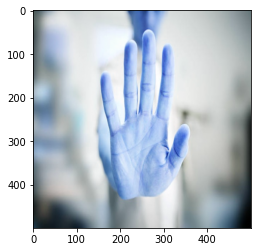

In [ ]:
IMG = r"C:\Users\suyash\Desktop\Hand detection\Hand Proces\Hand\3.jpg"
img = cv2.imread(IMG)
img = img/255
plt.imshow(img)

In [ ]:
model.predict(img.reshape(-1,416,416,3))

ValueError: in user code:

    File "C:\Users\suyash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\suyash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\suyash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\suyash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\suyash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\suyash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "BOX" is incompatible with the layer: expected shape=(None, 416, 416, 3), found shape=(None, 500, 500, 3)


In [ ]:
img.shape

(1, 500, 500, 3)